# Midterm 1 Assignment

#### Various Imports

In [187]:
import numpy as np
import math
import cv2
from matplotlib import pyplot as plt

### Convolution Method

In [256]:
def img_filter_convolution(image, filter):
    img_shape = image.shape
    filter_size = filter.shape[0]
    filtered_img_shape = tuple((lambda x: x - filter_size + 1)(x) for x in img_shape)
    filtered_img = np.zeros(filtered_img_shape)
    print(filter_size, filtered_img_shape)
    print(range(filtered_img_shape[0]))
    for x in range(filtered_img_shape[0]):
        for y in range(filtered_img_shape[1]):
            filtered_img[x, y] = (image[x:x+filter_size, y:y+filter_size] * filter).sum()
    return filtered_img

### Gaussian Filter Implementation
Implemented just for testing purposes

In [425]:
def gaussian_filter(scale, size=None):
    if size is None:
        size = int(2 * np.ceil(3*scale)) + 1
    v = np.arange((-size // 2) + 1, (size // 2) + 1)
    print(v)
    x = v * np.ones((size, size), dtype=int)
    y = x.T
    filter = 1/(2*np.pi*scale**2) * np.exp(-(x*x + y*y)/(2*scale**2))
    return filter

### LoG Filter Implementation

In [426]:
def partial_derivative_gaussian(x, gaussian: np.ndarray):
    """compute partial derivative of second order of a discrete gaussian kernel

    Parameters
    ----------
    x : float
        dimension to derive on, either x or y
    gaussian : np.ndarray
        filter to use for computation of LoG
    """

def LoG(scale, size=None):
    if size is None:
        size = int(2 * np.ceil(3*scale)) + 1
    v = np.arange((-size // 2) + 1, (size // 2) + 1)
    x = v * np.ones((size, size), dtype=int)
    y = x.T
    gaussian = 1/(2*np.pi*scale**2) * np.exp(-(x*x + y*y)/(2*scale**2))
    log_filter = ((x*x + y*y)/(scale**4) - 2/(scale**2))*gaussian
    return log_filter


In [433]:
image = cv2.imread("/home/davide/uni/ISPR-Midterms/Midterm1/MSRC_ObjCategImageDatabase_v1/sunflowers.jpg")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray.shape

(533, 800)

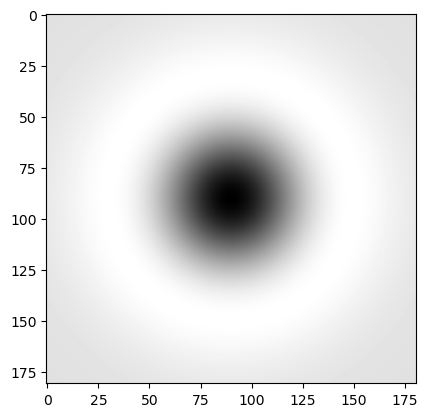

In [445]:
scale = 30
filter = LoG(scale)
plt.imshow(filter, cmap="gray")
plt.show()

In [446]:
output = img_filter_convolution(gray, filter)
output.shape

181 (353, 620)
range(0, 353)


(353, 620)

-0.06631041832847048 0.07703956468176099


<function matplotlib.pyplot.show(close=None, block=None)>

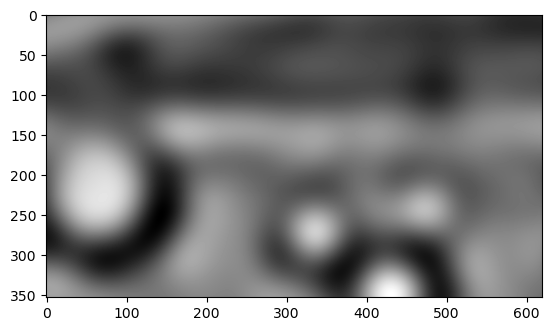

In [450]:
print(output.min(), output.max())
output = (output - output.min())/(output.max() - output.min()) * 255
plt.imshow(output, cmap="gray")
plt.show

255 0


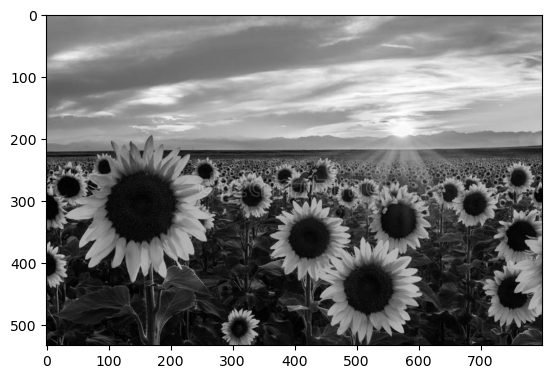

In [451]:
plt.imshow(gray, cmap="gray")
plt.show
print(image.max(), image.min())

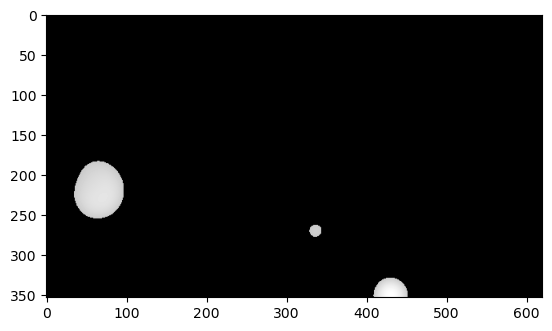

In [455]:
thresholded_output = (output > 200) * output
plt.imshow(thresholded_output, cmap="gray")
plt.show()

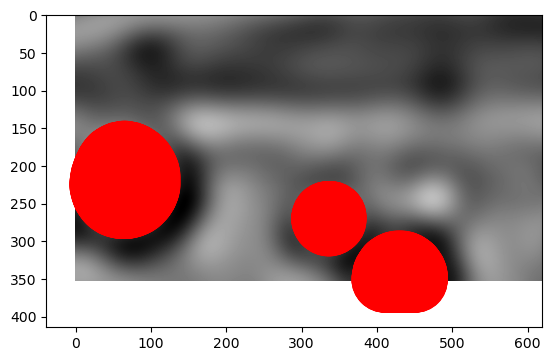

In [456]:
fig, ax = plt.subplots()
ax.imshow(output, cmap="gray")
x, y = output.shape
for row in range(x):
    for column in range(y):
        if thresholded_output[row, column] != 0:
            c = plt.Circle((column, row), scale*np.sqrt(2), color="red", linewidth = 0.5)
            ax.add_patch(c)
ax.plot()
plt.show()